# Introduction to Machine Learning

## Defining the Problem

Machine learning is an umbrella term that includes a lot of different techniques.  At a base level, what they have in common is that an algorithm takes in a data set, learns a pattern from it, and is able to predict an output for new unseen examples.  When starting to apply machine learning to a problem, it's helpful to first understand the type of problem you're dealing with.

### Regression vs Classification
Problems can be grouped by their output as either **regression** or **classification**.
* In regression problems, we are predicting a continuous variable. 
* In classification problems, we are predicting a categorical variable.


In [7]:
# Data stuffs
import pandas as pd
import numpy as np

# sklearn classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix


# visual stufss
import matplotlib.pyplot as plt


# decision tree visualization
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

%matplotlib inline

### Regression Model-Linear Regression

From our infant days in algebra we learn that a linear regression for a single input attribute can be modeled as the input times the rate of change of the output over the input plus the bias. The bias is the output value when there is not input.


In [8]:
%%html
<img src='LinearRegression.png', width=700, height=700>

### Classification Model-Logistic Regression

Linear regression builds the basis of **Logistic Regression** in the sense that the weights of the explanatory variable are ajusted to produce a continous number, then this number is passed through the **sigmoid function**.


$$\phi (x, w) = \frac{1}{1 + e^{-(w_{1}x + w_{0})}}$$

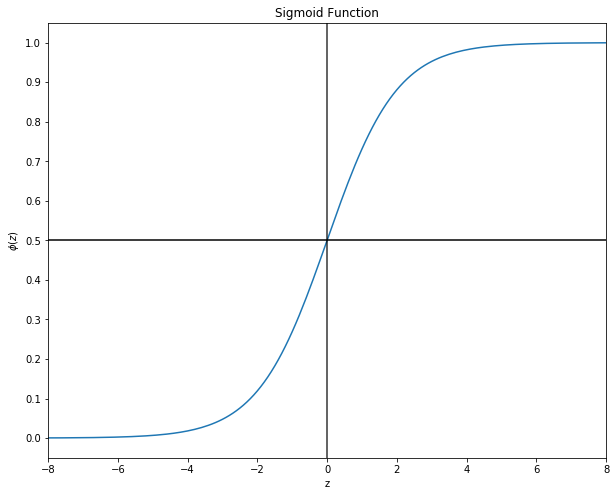

In [9]:
# Sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))


z = np.arange(-10, 10, 0.1)
phi = sigmoid(z)

#sigmoid visualization
fig, ax =plt.subplots(figsize=(10,8))
ax.plot(z, phi)
ax.axvline(0, c='k', alpha=0.8)
ax.axhline(0.5, c='k')
ax.set_xlim(-8, 8)
ax.set_xlabel('z')
ax.set_ylabel('$\phi(z)$')
ax.set_title('Sigmoid Function')
ax.set_yticks(np.arange(0, 1.1, 0.1))
plt.show()


The intersection at $\phi(0) = 0.5$ allows to create a threshold for binary classification wherre the final is:

$$\dot{y} = 
    \left\{
            \begin{array}{ll}
            1 & \mbox{if } \phi(x, w) \geq 0.5 \\
            0 & \mbox{if } otherwise
            \end{array}
         \right.$$

### Data Loading

In [40]:
df = pd.read_csv('titanic.csv')
df = df.rename(columns = {key:key.lower() for key in df.columns})

In [41]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The titanic data set is a rite of passage when learning machine learning.  Is this a classification or regression problem?

### Supervised vs Unsupervised
Problems can be grouped by their input as well.  Most of the examples we'll cover are supervised learning, but you may also see unsupervised or reinforcement learning.

* Supervised learning means that we have a data set that includes the labels we're trying to learn.
* Unsupervised learning means that our data set does not include labels, the algorithm is trying to find its own patterns in the data.  This usually involves transforming the data in some way.  Clustering is another example of unsupervised learning.
* Reinforcement learning includes training set ups that don't involve labels but do involve positive or negative feedback.

What type of learning are we doing on the titanic data set?

## Evaluating Our Model's Success

Let's start by talking about how we evaluate our models.  We need to think carefully about how to evaluate our models so that we can make meaningful comparisons between different algorithms and to other people's work. 

### Train / Test split

The most important part of evaluating our models is that we split our data into a training data set and a testing data set.  The testing data set will be totally withheld from the training process so that we can have a sense of how our model will generalize to unseen data.  We can use scikit learn's built in function for doing the splitting.

After training our model on the training set, we make predictions on the test set and compare our predictions to the actual labels.  In a classification problem, we are interested in a couple metrics.  An important one is accuracy, which is simply the number of test examples we got over the total number of test examples.  Accuracy doesn't tell the whole story, sometimes the *baseline accuracy* is already very high. 

What is the baseline accuracy in our titanic data set?

In [42]:
df.survived.sum() / len(df)

0.3838383838383838

## Precision and Recall

In addition to accuracy, precision and recall are the two other metrics of interest in classification problems.    
https://en.wikipedia.org/wiki/Precision_and_recall

There is a trade off between precision and recall (think about why this is true).  The receiver operating characteristic (ROC) curve captures the relationship between this trade off and accuracy.  The area under this curve, or ROC AUC, is another metric for evaluating classifiers.


## Feature Engineering

Most algorithms can only accept numerical inputs.  Our first task is to transform our data into a form that will work with our model.

In [43]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
# let's start with transforming the sex column, first we take a look at the possible values
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [45]:
# then we convert the text to a binary variable
df.sex = df.sex.map({'male':0, 'female':1}).astype(int)

In [46]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


Right now the variables that would work with our model are pclass, sex, age, sibsp, and parch.  Let's start looking at how these variables influence who survives

In [50]:
df.groupby('pclass').survived.mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [51]:
df.groupby('sex').survived.mean()

sex
0    0.188908
1    0.742038
Name: survived, dtype: float64

In [54]:
df.groupby('survived').age.mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

In [55]:
df.groupby('sibsp').survived.mean()

sibsp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64

In [56]:
df.groupby('parch').survived.mean()

parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: survived, dtype: float64

In [82]:
df.groupby('survived').fare.mean()

survived
0    22.117887
1    48.395408
Name: fare, dtype: float64

Sex and Class look like very strong predictors.  At first glance age doesn't seem useful though we can revisit this.  Siblings Present and Parents/Children are hard to parse, we may need to do additional transformations on those.

Let's try training a classifier only on class and sex to see what kind of result we get.  

First, we have to do our train test split!  The first argument to the function is our dataframe of features, the second argument is our label Series.  Test size is the ratio of the examples we want to be in the test set, 0.2 is a standard value.  Random state is there so other people can recreate the same split.  

In [59]:
train_features, test_features, train_labels, test_labels = train_test_split(
    df[['pclass', 'sex']], df.survived, test_size = 0.2, random_state = 33)

## Training a Model

Training a model is actually very straightforward in scikit learn.  We simply initialize our model object and then call the fit function.

In [97]:
model = LogisticRegression()
model.fit(train_features, train_labels)

/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

We can use our model to make predictions:

In [98]:
model.predict(test_features)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0])

In [99]:
model.predict([test_features.iloc[0, :]])

array([1])

In [100]:
# We could compare these to the actual values, but scikit learn has a built in method to do this for us.
accuracy_score(test_labels, model.predict(test_features))

0.7932960893854749

In [101]:
precision_score(test_labels, model.predict(test_features))

0.7611940298507462

In [102]:
recall_score(test_labels, model.predict(test_features))

0.7083333333333334

In [103]:
confusion_matrix(test_labels, model.predict(test_features))

array([[91, 16],
       [21, 51]])

## Understanding the Algorithms We're Using

## Decision Trees

Explanation to come

## Regression

Explanation to come

## Your turn

See if you can improve on our base model.  The two main improvements would be to add more features and try different algorithms.  Try incorporating the title or the parch and sibsp columns if you can.  